In [ ]:
import os
import time
import ZMQ_Stream
import sbxreader
import numpy as np
import matplotlib.pylab as plt
import zmq
from datetime import datetime as dt
def monitor_directory(directory):
    # Get initial set of files in the directory
    initial_files = set(os.listdir(directory))

    print("Monitoring new files in directory:", directory)
    try:
        while True:
            # Get the current set of files in the directory
            current_files = set(os.listdir(directory))

            # Find the difference between the current and initial set of files
            new_files = current_files - initial_files
            if new_files:
                for file in new_files:
                    print(f"New file created: {file}")
                    send_file_zmq(file)
                # Update the initial file set to the current files
                initial_files = current_files

            # Sleep for a while before checking again
            # time.sleep(1)
    except KeyboardInterrupt:
        print("Monitoring stopped.")




In [1]:
import os
import time
# import ZMQ_Stream
import sbxreader
import numpy as np
import matplotlib.pylab as plt
import zmq
from datetime import datetime as dt

ModuleNotFoundError: No module named 'sbxreader'

In [11]:
def send_file_zmq(ss, _socket):
    _socket.send_pyobj(dict({
        "type": 'b_img_data',
        "data": ss,
        "timestamp": str(dt.now())
    }))

In [2]:
s = sbxreader.sbx_memmap("F:\AC28\AC28_241003_001\AC28_241003_001.sbx")  # read
ss = np.array(s)  # change to numpy 
ss = np.squeeze(ss)

In [ ]:
# Don't run it again
context = zmq.Context()
_socket = context.socket(zmq.PUB)  # publishing

send_IP = "*"
send_port = "5009"
_socket.bind('tcp://' + send_IP+":" +send_port)  # connecting

<SocketContext(bind='tcp://*:5009')>

In [16]:
for i in range(100):
    send_file_zmq(ss[i], _socket)

In [ ]:
# if __name__ == "__main__":
#     # Monitor the current directory
current_directory = os.getcwd()
monitor_directory(current_directory)

In [2]:
import sbxreader

# sbxreader.sbx_get_metadata("F:\AC28\AC28_241003_001\AC28_241003_001.sbx")
s = sbxreader.sbx_memmap("F:\AC28\AC28_241003_001\AC28_241003_001.sbx")

In [15]:
# ss = s.to_numpy()

In [5]:
import numpy as np
ss = np.array(s)

In [8]:
ss = np.squeeze(ss)
ss.shape

(25000, 512, 796)

In [7]:
import matplotlib.pylab as plt

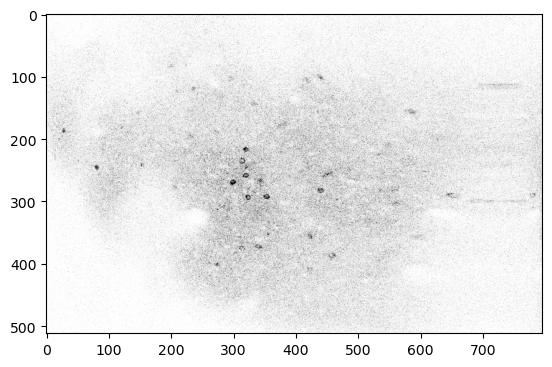

In [14]:
plt.imshow(ss[5000], cmap='gray')

testing for Matlab tcp connections

In [6]:
# context = zmq.Context()
# _socket = context.socket(zmq.REP)  # publishing

# send_IP = "10.65.30.78"#"10.65.15.167"
# send_port = "5009"
# _socket.bind('tcp://' + send_IP+":" +send_port)  # connecting

# print("Server is listening on port 5009")

# # Server loop to receive messages
# while True:
#     message = _socket.recv()  # Wait for a message from the client
#     print("Received message of length:", len(message))
    
#     # Process the message (e.g., save it, display it)
#     # Here, we just print the message for demonstration
    
#     # Send a response back to the client
#     _socket.send


In [ ]:
# conn, addr = server_socket.accept()  # this is not established
# print(f"Connection established with {addr}")
# conn.sendall(b"python server received connection")

# # image dimensions (height and width)
# height = struct.unpack('I', conn.recv(4))[0]  # Receive 4 bytes for height
# conn.sendall(b"Height received")  # Acknowledge receipt

# width = struct.unpack('I', conn.recv(4))[0]   # Receive 4 bytes for width
# conn.sendall(b"Width received")  # Acknowledge receipt

# print(f"Expecting image of size: {height}x{width}")

# # receive the image data
# image_data = bytearray()
# while len(image_data) < height * width:
#     packet = conn.recv(4096)
#     if not packet:
#         break
#     image_data.extend(packet)

# # Convert the image data back into a numpy array
# image_array = np.frombuffer(image_data, dtype=np.uint8).reshape((height, width))
# print("Image received successfully")

# # Send acknowledgment back to MATLAB
# conn.sendall(b"Image data received")
# conn.close()

In [1]:
# zmq probably wraps the socket library somewhere; translation socket object to zmq object
import socket
import numpy as np
import struct
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [3]:
# server setup
server_ip = "10.65.30.78" #'127.0.0.1'#"0.0.0.0"  # Listen on all network interfaces; 127.0.0.1
server_port = 5009 #'10.65.15.167', 55399

# TCP socket
# benchmark ts; send image every 30 ms; print out here --> scale up to zmq
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # this is just pure TCP connection, not through ZMQ
server_socket.bind((server_ip, server_port))
server_socket.listen(1)  # listen for a single incoming connection

print(f"Server is listening on port {server_port}")

Server is listening on port 5009


In [4]:
# prev_time = str(dt.now())[:-3]
prev_time = dt.now()
while True:
    ## connection
    conn, addr = server_socket.accept() 
    # print(f"Connection established with {addr}")
    conn.sendall(b"python server received connection")
    try:        
        first_message = conn.recv(4)
        if first_message.decode('utf-8') == "done":
            print("Termination signal received. connection closed")
            conn.close()
            break
        # image dimensions (height and width)
        height = struct.unpack('I', first_message)[0]  # Receive 4 bytes for height
        # conn.sendall(b"Height received")  # Acknowledge receipt

        width = struct.unpack('I', conn.recv(4))[0]   # Receive 4 bytes for width
        # conn.sendall(b"Width received")  # Acknowledge receipt

        print(f"Expecting image of size: {height}x{width}") 
        # receive the image data
        image_data = bytearray()
        while len(image_data) < height * width:
            packet = conn.recv(4096)
            if not packet:
                break
            image_data.extend(packet)

        # Convert the image data back into a numpy array
        image_array = np.frombuffer(image_data, dtype=np.uint8).reshape((height, width))
        # plt.imshow(image_array, cmap = "gray")
        # plt.show()
        # time = str(dt.now())[:-3]
        time = dt.now()
        print(f"{str(time)[:-3]} - Image received successfully")
        print(f"Time difference:{int((time-prev_time).total_seconds()*1000)}")
        prev_time = time
        # conn.sendall(b"Image data received")  # Send acknowledgment back to MATLAB
    except Exception as e:
        print(f"error receiving msg: {e}")
    finally:
        conn.close()
        


Expecting image of size: 100x100
2024-11-12 16:19:03.693 - Image received successfully
Time difference:2887
Expecting image of size: 100x100
2024-11-12 16:19:03.803 - Image received successfully
Time difference:110
Expecting image of size: 100x100
2024-11-12 16:19:03.914 - Image received successfully
Time difference:111
Expecting image of size: 100x100
2024-11-12 16:19:04.041 - Image received successfully
Time difference:126
Expecting image of size: 100x100
2024-11-12 16:19:04.162 - Image received successfully
Time difference:120
Expecting image of size: 100x100
2024-11-12 16:19:04.280 - Image received successfully
Time difference:118
Expecting image of size: 100x100
2024-11-12 16:19:04.392 - Image received successfully
Time difference:111
Expecting image of size: 100x100
2024-11-12 16:19:04.512 - Image received successfully
Time difference:120
Expecting image of size: 100x100
2024-11-12 16:19:04.624 - Image received successfully
Time difference:112
Expecting image of size: 100x100
202

In [21]:
prev_time = dt.now()

In [22]:
time = dt.now()
int((time-prev_time).total_seconds()*1000)

542

In [14]:
image_array

array([[255, 255,   0, ..., 255,   0,   0],
       [  0, 255,   0, ...,   0, 255, 255],
       [255, 255,   0, ..., 255,   0, 255],
       ...,
       [255, 255,   0, ..., 255,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0, 255, 255, ...,   0, 255,   0]], dtype=uint8)

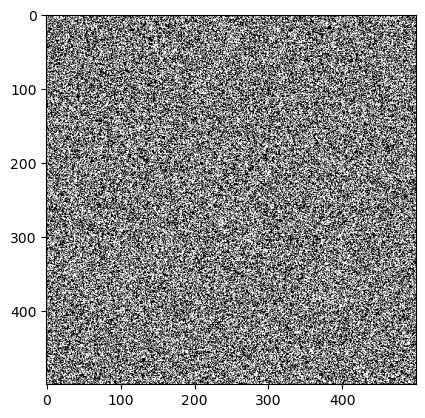

In [15]:
plt.imshow(image_array, cmap = "gray")